##  Pairs trading arbitrage

Gatev, E., Goetzmann, W. N., & Rouwenhorst, K. G. (2006). Pairs trading: Performance of a relative-value arbitrage rule. *Review of Financial Studies*, 19(3), 797-827. https://doi.org/10.1093/rfs/hhj020

<blockquote>Wall Street has long been interested in quantitative methods of speculation. One popular short-term speculation strategy is known as “pairs trading.” The strategy has at least a 20-year history on Wall Street and is among the proprietary “statistical arbitrage” tools currently used by hedge funds as well as investment banks.</blockquote>

<blockquote>The concept of pairs trading is disarmingly simple. Find two stocks whose prices have moved together historically. When the spread between them widens, short the winner and buy the loser. If history repeats itself, prices will converge and the arbitrageur will profit. It is hard to believe that such a simple strategy, based solely on past price dynamics and simple contrarian principles, could possibly make money. If the U.S. equity market were efficient at all times, risk-adjusted returns from pairs trading should not be positive.</blockquote>

In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

In [2]:
pair = pd.read_csv('https://github.com/stoffprof/qf22/raw/main/data/pair_KN_R.zip',
                   parse_dates=['date'])

In [3]:
pair

,permno,ticker,date,ret,mktcap
0,12706,KN,1962-07-02,-0.007055,777854.90
1,12706,KN,1962-07-03,0.005329,781999.75
2,12706,KN,1962-07-05,0.003534,784763.00
3,12706,KN,1962-07-06,-0.014085,773710.00
4,12706,KN,1962-07-09,0.014286,784763.00
...,...,...,...,...,...
10578,14912,R,1985-09-18,0.000000,749371.10
10579,14912,R,1985-09-19,0.000000,749371.10
10580,14912,R,1985-09-20,0.005780,753702.75
10581,14912,R,1985-09-23,0.005747,758034.40


In [5]:
# Boolean selection

pair[pair['date'] == '1962-07-02']

,permno,ticker,date,ret,mktcap
0,12706,KN,1962-07-02,-0.007055,777854.90
4746,14912,R,1962-07-02,0.008671,254639.12


In [7]:
pair = pair.pivot(index='date', columns='ticker', values='ret')

In [8]:
pair.head()

ticker,KN,R
date,,
1962-07-02,-0.007055,0.008671
1962-07-03,0.005329,-0.002865
1962-07-05,0.003534,0.005747
1962-07-06,-0.014085,-0.005714
1962-07-09,0.014286,0.002874


In [9]:
pair = pair.loc[:'1964-12-31']

In [10]:
pair

ticker,KN,R
date,,
1962-07-02,-0.007055,0.008671
1962-07-03,0.005329,-0.002865
1962-07-05,0.003534,0.005747
1962-07-06,-0.014085,-0.005714
1962-07-09,0.014286,0.002874
...,...,...
1964-12-24,-0.001364,0.002012
1964-12-28,-0.008197,0.000000
1964-12-29,-0.008264,-0.012048


In [13]:
retidx = (1+pair).cumprod()

retidx.head()

ticker,KN,R
date,,
1962-07-02,0.992945,1.008671
1962-07-03,0.998236,1.005781
1962-07-05,1.001764,1.011561
1962-07-06,0.987654,1.005781
1962-07-09,1.001764,1.008672


We can now replicate **Figure 1** from Gatev, Goetzmann, and Rouwenhorst (2006).

<img src="https://kelley.iu.edu/nstoffma/da/Gatev_fig1.png"
style="display: block; margin-left: auto; margin-right: auto; width: 60%;">

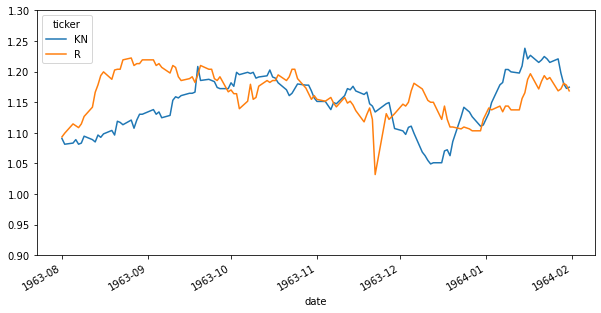

In [17]:
retidx.loc['1963-08':'1964-01'].plot(figsize=(10,5), ylim=(0.9, 1.3));

Gatev *et al.* calculate squared price deviations, $(P_1 - P_2)^2$, and follow a rule that

<blockquote>... opens a position in a pair on the day following the day on which the prices of the stocks in the pair diverge by two historical standard deviations.</blockquote>

In [18]:
smpl = retidx.loc['1963-08':'1964-01'].copy()

smpl['sqdev'] = (smpl['R'] - smpl['KN'])**2

In [20]:
smpl.head()

ticker,KN,R,sqdev
date,,,
1963-08-01,1.090821,1.093382,0.000007
1963-08-02,1.081434,1.099457,0.000325
1963-08-05,1.083311,1.114643,0.000982
1963-08-06,1.088943,1.111605,0.000514
1963-08-07,1.081433,1.108569,0.000736


In [22]:
2 * smpl['sqdev'].std()

0.006628988630461661

# A larger data set

In [24]:
crsp = pd.read_csv('https://github.com/stoffprof/qf22/raw/main/data/crsp_8588.zip',
                   parse_dates=['date'])

In [26]:
crsp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751654 entries, 0 to 751653
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   ticker  751654 non-null  object        
 1   date    751654 non-null  datetime64[ns]
 2   ret     751246 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 17.2+ MB


In [27]:
crsp['ticker'].value_counts()

AAC      1011
MACK     1011
KNDR     1011
KO       1011
KR       1011
         ... 
FHLPZ       5
FLX         5
OCCXZ       5
ERGS        3
TEXZ        1
Name: ticker, Length: 1109, dtype: int64

In [29]:
len(crsp['ticker'].unique())

1109

In [31]:
crsp = crsp.pivot(index='date', columns='ticker', values='ret')

In [32]:
(1+crsp).cumprod()

ticker,AAC,AAF,AAL,AAPL,ABCI,ABKR,ABSB,ABX,ABXFF,AC,...,Z,ZB,ZBST,ZE,ZF,ZIF,ZOEP,ZOND,ZRN,ZTR
date,,,,,,,,,,,,,,,,,,,,,
1985-01-02,1.000000,NaN,1.000000,0.957082,NaN,NaN,NaN,NaN,NaN,0.990099,...,1.000000,0.981550,NaN,1.000000,NaN,NaN,1.0,0.945946,0.995192,NaN
1985-01-03,1.000000,NaN,1.022222,0.974249,NaN,NaN,NaN,NaN,NaN,0.992574,...,0.993243,0.977860,NaN,0.981013,NaN,NaN,1.0,0.959460,0.990384,NaN
1985-01-04,1.000000,NaN,1.022222,0.974249,NaN,NaN,NaN,NaN,NaN,0.992574,...,0.996621,0.963101,NaN,0.962025,NaN,NaN,1.0,0.959460,0.995192,NaN
1985-01-07,0.941176,NaN,1.044444,0.969958,NaN,NaN,NaN,NaN,NaN,0.992079,...,1.003378,0.970481,NaN,0.943038,NaN,NaN,1.0,0.972974,1.009615,NaN
1985-01-08,0.941176,NaN,1.077778,0.961373,NaN,NaN,NaN,NaN,NaN,0.984544,...,1.020270,0.988931,NaN,0.924051,NaN,NaN,1.0,0.972974,1.028846,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1988-12-23,3.823529,0.999066,1.226413,2.862822,NaN,0.598039,0.567485,1.530303,NaN,1.969472,...,3.123236,NaN,NaN,0.943046,1.227575,0.992373,NaN,NaN,2.442339,0.927755
1988-12-27,3.705883,0.969709,1.200593,2.819313,NaN,0.588235,0.567485,1.518532,NaN,1.945744,...,3.123236,NaN,NaN,0.949375,1.227575,0.992373,NaN,NaN,2.409482,0.953172
1988-12-28,3.764706,0.956780,1.213503,2.801909,NaN,0.588235,0.560564,1.506760,NaN,1.945744,...,3.169507,NaN,NaN,0.955704,1.227575,0.992373,NaN,NaN,2.365673,0.927754


In [36]:
crsp = crsp.dropna(axis=1, how='any')

crsp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1011 entries, 1985-01-02 to 1988-12-30
Columns: 465 entries, AAC to ZRN
dtypes: float64(465)
memory usage: 3.6 MB


In [37]:
retidx = (1+crsp).cumprod()

In [39]:
retidx[['IBM', 'KO', 'LLY']]

ticker,IBM,KO,LLY
date,,,
1985-01-02,0.982741,0.991984,0.982955
1985-01-03,0.974620,1.002004,0.986743
1985-01-04,0.972589,1.000000,0.984850
1985-01-07,0.977665,1.006012,0.981062
1985-01-08,0.972589,1.008016,0.986744
...,...,...,...
1988-12-23,1.144974,2.486723,2.998505
1988-12-27,1.142655,2.472829,2.968691
1988-12-28,1.136854,2.472829,2.943137


In [40]:
df = retidx.loc['1985']

In [41]:
df.head()

ticker,AAC,AAL,AAPL,ACB,ACCOB,ACIX,ACY,ADAC,AEAGF,AEP,...,WTHG,WX,WY,XICO,XON,XRX,YELL,Z,ZE,ZRN
date,,,,,,,,,,,,,,,,,,,,,
1985-01-02,1.000000,1.000000,0.957082,0.993289,1.000000,0.972222,0.982500,1.029412,0.972414,0.988166,...,1.005435,0.995215,1.012876,0.986486,0.988889,1.000000,1.000000,1.000000,1.000000,0.995192
1985-01-03,1.000000,1.022222,0.974249,1.006712,1.085271,0.981481,0.972500,0.970588,0.955173,0.994083,...,1.000001,0.980861,1.021460,1.067567,0.988889,0.996700,1.000000,0.993243,0.981013,0.990384
1985-01-04,1.000000,1.022222,0.974249,1.000001,1.100775,0.962963,0.970000,1.000000,0.944829,0.988166,...,1.005436,0.990430,1.012877,1.121621,0.983333,0.996700,1.000000,0.996621,0.962025,0.995192
1985-01-07,0.941176,1.044444,0.969958,1.006712,1.077519,0.962963,0.980000,1.058824,0.968966,1.000001,...,1.005436,0.990430,1.012877,1.135135,0.991667,0.996700,1.007813,1.003378,0.943038,1.009615
1985-01-08,0.941176,1.077778,0.961373,1.013423,1.077519,0.972222,0.987499,1.176471,0.958621,0.994084,...,1.010870,0.985646,1.012877,1.121621,0.991667,0.983499,1.039063,1.020270,0.924051,1.028846


In [42]:
df = df / df.iloc[0]

df.head()

ticker,AAC,AAL,AAPL,ACB,ACCOB,ACIX,ACY,ADAC,AEAGF,AEP,...,WTHG,WX,WY,XICO,XON,XRX,YELL,Z,ZE,ZRN
date,,,,,,,,,,,,,,,,,,,,,
1985-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1985-01-03,1.000000,1.022222,1.017937,1.013514,1.085271,1.009524,0.989822,0.942857,0.982270,1.005988,...,0.994595,0.985577,1.008475,1.082192,1.000000,0.996700,1.000000,0.993243,0.981013,0.995169
1985-01-04,1.000000,1.022222,1.017937,1.006757,1.100775,0.990476,0.987277,0.971428,0.971632,1.000000,...,1.000001,0.995192,1.000001,1.136987,0.994382,0.996700,1.000000,0.996621,0.962025,1.000000
1985-01-07,0.941176,1.044444,1.013453,1.013513,1.077519,0.990476,0.997455,1.028572,0.996454,1.011976,...,1.000001,0.995192,1.000001,1.150685,1.002809,0.996700,1.007813,1.003378,0.943038,1.014493
1985-01-08,0.941176,1.077778,1.004484,1.020270,1.077519,1.000000,1.005089,1.142857,0.985816,1.005988,...,1.005406,0.990385,1.000001,1.136986,1.002809,0.983499,1.039063,1.020270,0.924051,1.033817


In [45]:
s1 = 'KO'
s2 = 'IBM'

In [44]:
((df[s1] - df[s2])**2).sum()

2.7098673666706086

In [47]:
# iterate over columns (tickers) and store sum of squared deviations in a dict
sqd = {}
for s1 in df:  # iterate over column names of df
  for s2 in df:
    sqd[(s1,s2)] = ((df[s1] - df[s2])**2).sum()

In [48]:
'IBM' < 'KO'

True

In [57]:
# iterate over columns (tickers) and store sum of squared deviations in a dict
sqd = {}
for s1 in df:  # iterate over column names of df
  for s2 in df:
    if s1 != s2:
      sqd[(s1,s2)] = ((df[s1] - df[s2])**2).sum()

In [58]:
len(sqd)

215760

In [59]:
sqd[('KO', 'IBM')]

2.7098673666706086

In [60]:
sqd[('IBM', 'KO')]

2.7098673666706086

In [61]:
sqd = pd.Series(sqd).reset_index()
sqd.columns = ['s1', 's2', 'sqd']

In [62]:
sqd.head()

,s1,s2,sqd
0,AAC,AAL,20.780595
1,AAC,AAPL,165.321353
2,AAC,ACB,48.240708
3,AAC,ACCOB,51.461619
4,AAC,ACIX,95.609446


In [64]:
sqd[sqd['s1']=='IBM']['sqd'].min()

0.3276165273530166

In [65]:
sqd[sqd['s1']=='IBM']['sqd'].idxmin()

98079

In [66]:
sqd.loc[98079]

s1          IBM
s2           GE
sqd    0.327617
Name: 98079, dtype: object

In [67]:
sqd

,s1,s2,sqd
0,AAC,AAL,20.780595
1,AAC,AAPL,165.321353
2,AAC,ACB,48.240708
3,AAC,ACCOB,51.461619
4,AAC,ACIX,95.609446
...,...,...,...
215755,ZRN,XON,5.733916
215756,ZRN,XRX,1.376197
215757,ZRN,YELL,4.102819
215758,ZRN,Z,1.448954


In [69]:
minids = sqd.groupby('s1')['sqd'].idxmin()

In [71]:
pairs = sqd.loc[minids]

In [73]:
pairs = pairs.sort_values('sqd').reset_index(drop=True)

In [74]:
pairs

,s1,s2,sqd
0,NSP,SO,0.124150
1,SO,NSP,0.124150
2,CSR,NSP,0.149058
3,BLS,AIT,0.159658
4,AIT,BLS,0.159658
...,...,...,...
460,CRZY,SFCD,19.425828
461,LMED,SFCD,21.320768
462,ASTA,STRA,32.277096
463,TOS,LMED,98.961333


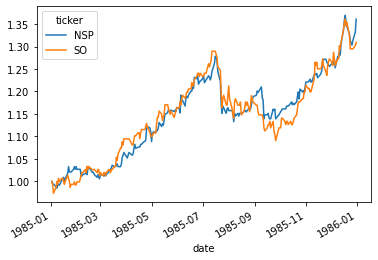

In [76]:
df[['NSP', 'SO']].plot()

In [78]:
# calculate threshold

2 * ((df['NSP'] - df['SO'])**2).std()

0.0012706461038069772

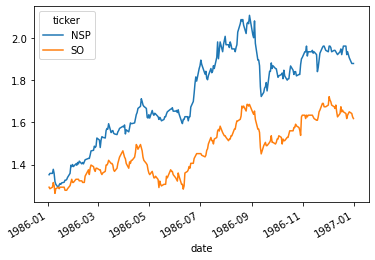

In [81]:
retidx.loc['1986', ['NSP', 'SO']].plot()